In [28]:
# Question 1
import matplotlib.pyplot as plt
import numpy as np

In [29]:
x_train = np.load('./drive/MyDrive/x_train.npy')
y_train = np.load('./drive/MyDrive/y_train.npy')

In [30]:
x_test = np.load('./drive/MyDrive/x_test.npy')
y_test = np.load('./drive/MyDrive/y_test.npy')

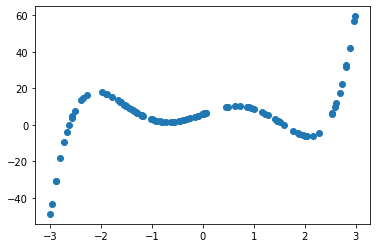

In [31]:
plt.scatter(x_train, y_train)


In [32]:
# Since it's not linear. So add basis function for non linearity
# Let's define the cost function

def least_mean_square(y_actual, y_predicted):
      
    # calculating cost
    # Formular => cost = np.sum( (y_actual - y_predicted) ** 2 ) / len(y_actual)
    cost = np.mean((y_predicted - y_actual) ** 2)
    return cost

In [33]:
# define gradient descent

def gradient_descent(x, y_estimated, num_iterations = 10000, learning_rate = 0.0001):
    
    current_bias = 0.1
    current_weight = np.ones((1, 5))
    n = float(len(x))
    
    # interating for theta values
    for i in range(num_iterations):
        
        # predict the y_estimated value from the y_estimated = mx + b
        y_predicted = (current_weight.dot(x.T)) + current_bias
        
        # calculate the current cost
        current_cost = least_mean_square(y_estimated, y_predicted)
          
        # calculate the gradients
        weight_derivative = -(2/n) * sum(x * (y_estimated - y_predicted.T))
        bias_derivative = -(2/n) * sum(y_estimated - y_predicted.T)
          
        # updates weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        if (i % 500 == 0):
            print("Iteration {}: Cost: {}, Weight: {}, Bias: {}".format(i, current_cost, current_weight, current_bias))
            
    return current_weight, current_bias

Iteration 0: Cost: 9471.902773879518, Weight: [[ 0.97545265  0.9787825   0.82721487  0.83811082 -0.29154987]], Bias: [0.09747448]
Iteration 500: Cost: 333.2277554490155, Weight: [[ 0.31725864  1.15096497 -0.96900995 -0.04293504  0.25583913]], Bias: [0.37302626]
Iteration 1000: Cost: 346.4161387949065, Weight: [[-0.0195077   1.35185162 -2.06207219 -0.07558495  0.40405791]], Bias: [0.60111126]
Iteration 1500: Cost: 360.68676867147775, Weight: [[-0.16500022  1.49601435 -2.72052818 -0.09933179  0.49233374]], Bias: [0.78636424]
Iteration 2000: Cost: 371.1900392516915, Weight: [[-0.19882361  1.60097007 -3.12465603 -0.11696305  0.54553565]], Bias: [0.94208514]
Iteration 2500: Cost: 377.9923029075277, Weight: [[-0.16767078  1.67794994 -3.38004383 -0.13025633  0.57823056]], Bias: [1.07671594]
Iteration 3000: Cost: 382.128583467141, Weight: [[-0.09893305  1.73434827 -3.54850399 -0.14037457  0.5989472 ]], Bias: [1.19574977]
Iteration 3500: Cost: 384.54492099859436, Weight: [[-0.00868111  1.775182

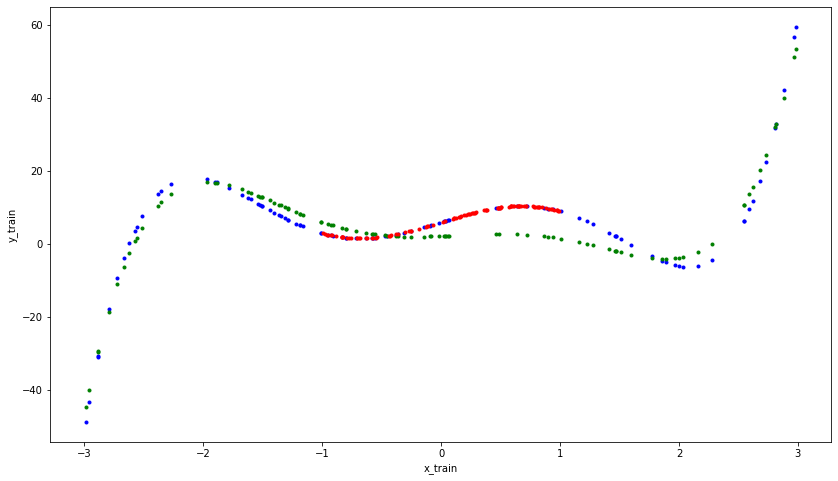

In [34]:
#main function

def main():
    # import data
    x_train = np.load('./drive/MyDrive/x_train.npy')
    y_train = np.load('./drive/MyDrive/y_train.npy')
    x_test = np.load('./drive/MyDrive/x_test.npy')
    y_test = np.load('./drive/MyDrive/y_test.npy')

    
    # create x values of orders 2 - 5
    x2 = np.array(x_train)
    np.square(x_train, x2)
    x3 = np.array(x_train)
    x3 = np.power(x3, 3)
    x4 = np.array(x_train)
    x4 = np.power(x4, 4)
    x5 = np.array(x_train)
    x5 = np.power(x5, 5)
    
    # appending basis functions to x_train data
    x_trainBasis = np.array(x_train)
    x_trainBasis = np.append(x_trainBasis, x2, 1)
    x_trainBasis = np.append(x_trainBasis, x3, 1)
    x_trainBasis = np.append(x_trainBasis, x4, 1)
    x_trainBasis = np.append(x_trainBasis, x5, 1)
    
    # transpose the matrix
    y_train = np.reshape(y_train, (100, 1))
    
    # estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(x_trainBasis, y_train)
    print("Estimated Weight: {} -- Estimated Bias: {}".format(estimated_weight, estimated_bias))

    y_estimated = np.empty((100, 1))
    y_estimated = (estimated_weight.dot(x_trainBasis.T)) + estimated_bias
    y_estimated = np.reshape(y_estimated, (-1, 1))
    
    # plotting the test data line
    plt.figure(figsize = (14,8))
    # train data
    plt.scatter(x_train, y_train, marker='.', color='blue')
    # predicted model
    plt.scatter(x_train, y_estimated, marker='.', color='green')
    # test data
    plt.scatter(x_test, y_test, marker='.', color='red')
    plt.xlabel("x_train")
    plt.ylabel("y_train")
    plt.show()

if __name__=="__main__":
    main()

In [35]:
#Question 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
def least_mean_square(y_actual, y_predicted):
      
    # calculating cost
    # Formular => cost = np.sum( (y_actual - y_predicted) ** 2 ) / len(y_actual)
    cost = np.mean((y_predicted - y_actual) ** 2)
    return cost

In [37]:
# define gradient descent

def gradient_descent(x, y_estimated, num_iterations = 10000, learning_rate = 0.0001):
    
    current_bias = 0.1
    current_weight = np.ones((1, 10))
    n = float(len(x))
    
    # interating for theta values
    for i in range(num_iterations):
        
        # predict the y_estimated value from the y_estimated = mx + b
        y_predicted = (current_weight.dot(x.T)) + current_bias
        
        # calculate the current cost
        current_cost = least_mean_square(y_estimated, y_predicted)
          
        # calculate the gradients
        weight_derivative = -(2/n) * sum(x * (y_estimated - y_predicted.T))
        bias_derivative = -(2/n) * sum(y_estimated - y_predicted.T)
          
        # updates weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        if (i % 500 == 0):
            print("Iteration {}: Cost: {}, Weight: {}, Bias: {}".format(i, current_cost, current_weight, current_bias))
            
    return current_weight, current_bias

Iteration 0: Cost: 1837.0466354479993, Weight: [[0.96623728 0.99314792 0.96950528 0.99154136 0.99255438 0.95502814
  0.97713396 0.64536714 0.98459494 0.99297692]], Bias: [0.09297692]
Iteration 500: Cost: 924.1590236290405, Weight: [[ 2.43445253  1.21022279  1.39478287  1.270903    1.22788863  1.37078463
   1.19671446 -0.18328706  1.01086978  0.983593  ]], Bias: [0.083593]
Iteration 1000: Cost: 933.6555068976751, Weight: [[ 2.73665931  1.25498767  1.06913326  1.32361771  1.34294492  1.30683339
   1.1564087  -0.17425307  0.90953211  0.94733798]], Bias: [0.04733798]
Iteration 1500: Cost: 940.7730436828277, Weight: [[ 2.96958064  1.29286676  0.826758    1.36491061  1.43632118  1.24025849
   1.11378963 -0.16476231  0.82583711  0.91763209]], Bias: [0.01763209]
Iteration 2000: Cost: 946.7634028256513, Weight: [[ 3.15185748  1.32595133  0.64868534  1.39784113  1.51359265  1.17374337
   1.07076593 -0.15585326  0.7573278   0.89318606]], Bias: [-0.00681394]
Iteration 2500: Cost: 951.6996311186617

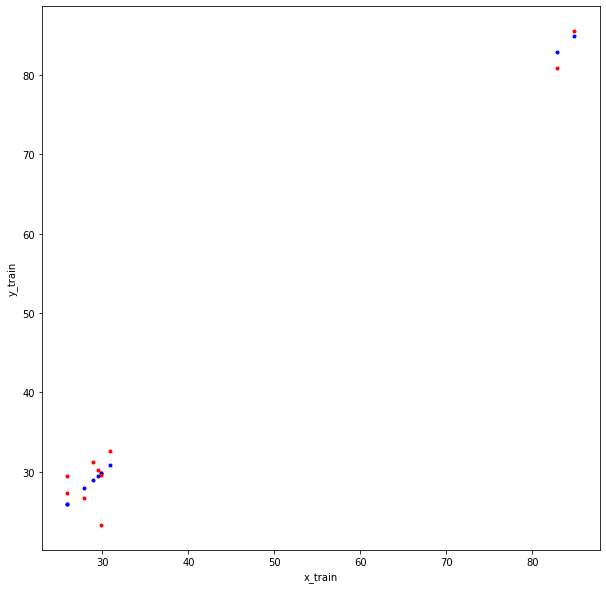

In [38]:
def main():
    # import data
    stillwater = pd.read_csv("./drive/MyDrive/Assignment1_Q2_Data.csv")
    sp = np.array(stillwater)
    
    x = sp[:, 0:1]
    housePrice = sp[:10, 12]
    sp = sp[:10, 1:11 ]
    
    # transposing the matrix
    housePrice = np.reshape(housePrice, (10, 1))
    x = np.reshape(housePrice, (10, 1))

    
    # estimate weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(sp, housePrice)
    print("Estimated Weight: {} -- Estimated Bias: {}".format(estimated_weight, estimated_bias))

    y_estimated = np.empty((10, 1))
    y_estimated = (estimated_weight.dot(sp.T)) + estimated_bias
    y_estimated = np.reshape(y_estimated, (-1, 1))
    
    # plott the test data line
    plt.figure(figsize = (10,10))
    plt.scatter(x, housePrice, marker='.', color='blue')
    plt.scatter(x, y_estimated, marker='.', color='red')
    plt.xlabel("x_train")
    plt.ylabel("y_train")
    plt.show()
  
if __name__=="__main__":
    main()

In [39]:
#Question3
import numpy as np
import matplotlib.pyplot as plt

(100, 2)


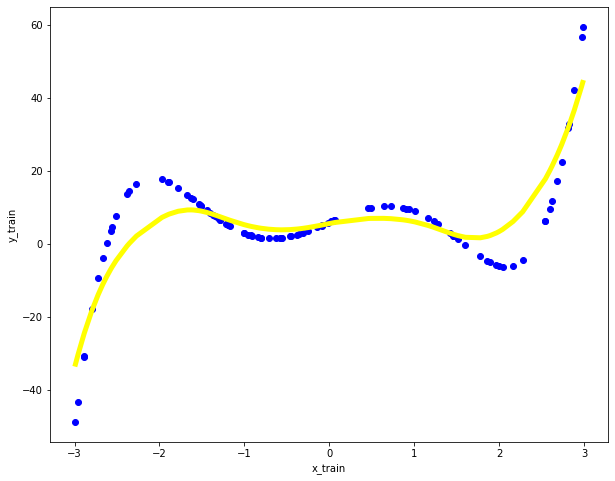

In [40]:
def kernel(point, xmat, k):
  m,n = np.shape(xmat)
  weights = np.mat(np.eye((m)))

  for j in range(m):
    diff = point - X[j]
    weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))

  return weights


def localWeight(point, xmat, ymat, k):
  wt = kernel(point, xmat, k)
  W = (X.T * (wt*X)).I * (X.T * wt * ymat.T)
  return W

def localWeightRegression(xmat, ymat, k):
  m,n = np.shape(xmat)
  ypred = np.zeros(m)

  for i in range(m):
    ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)

  return ypred


x_train = np.load('./drive/MyDrive/x_train.npy')
y_train = np.load('./drive/MyDrive/y_train.npy')

mx = np.mat(x_train)
my = np.mat(y_train)

m = np.shape(my)[1]
one = np.ones((1,m), dtype = int)

#horizontal stacking
X = np.hstack((one.T, mx))
print(X.shape)


ypred = localWeightRegression(X, my, 0.5)

xsort = X.copy()
xsort.sort(axis=0)
plt.figure(figsize = (10,8))
plt.scatter(x_train, y_train, color='blue')
plt.plot(xsort[:,1], ypred[X[:,1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.show()
